# **Assignment Week-9**: Geospatial

**Nama:** Chairunnisa Mahadewi Budi Santosa

**NIM:** 1301213104

**Kelas:** IF-44-DS01

Buatlah visualisasi geospatial yang menunjukkan data tertentu di Indonesia dengan basis provinsi pada periode tertentu.

**Source Dataset:** https://www.kaggle.com/datasets/hendratno/covid19-indonesia

**Import Library**

In [ ]:
pip install geoplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 34.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
from geopandas import GeoDataFrame

**Fetch Shapefile Indonesia dan Dataset COVID-19 Indonesia**

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


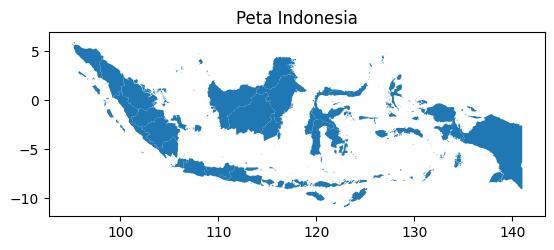

In [ ]:
gdf_ind = gpd.read_file('/content/drive/MyDrive/3. DATASET/SHAPEFILE_INDONESIA/Batas Provinsi.shp')
gdf_ind.plot()
plt.title('Peta Indonesia')
plt.show()

In [ ]:
gdf_ind.head()

,No,Kode_Prov,Provinsi,geometry
0,11.0,52,NUSA TENGGARA BARAT,"MULTIPOLYGON (((118.72881 -8.35901, 118.72886 ..."
1,22.0,53,NUSA TENGGARA TIMUR,"MULTIPOLYGON (((122.65419 -8.63712, 122.62966 ..."
2,25.0,63,KALIMANTAN SELATAN,"MULTIPOLYGON (((114.88632 -2.50353, 114.91290 ..."
3,27.0,65,KALIMANTAN UTARA,"MULTIPOLYGON (((116.58930 4.37422, 116.61513 4..."
4,30.0,76,SULAWESI BARAT,"MULTIPOLYGON (((119.86380 -1.96121, 119.87027 ..."


In [ ]:
df_cvd = pd.read_csv('/content/drive/MyDrive/3. DATASET/covid_19_indonesia_time_series_all.csv')
df_cvd.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,...,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.0,1.0


**Exploratory Data Analysis**

In [ ]:
columns = ['Date','Location','New Cases','New Deaths','New Recovered','New Active Cases','Total Cases','Total Deaths','Total Recovered','Total Active Cases']
df_cvd = df_cvd[columns]
df_cvd = df_cvd.apply(lambda x : x.astype(str).str.upper())
df_cvd.tail()

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases
31817,9/15/2022,SULAWESI UTARA,37,0,0,37,52770,1213,50997,560
31818,9/15/2022,SUMATERA BARAT,13,0,3,10,104640,2371,102066,203
31819,9/15/2022,SUMATERA SELATAN,16,0,1,15,82198,3376,78510,312
31820,9/15/2022,SUMATERA UTARA,50,0,5,45,158866,3288,154924,654
31821,9/16/2022,INDONESIA,2358,27,2997,-666,6405044,157876,6218708,28460


In [ ]:
numbercases = df_cvd.loc[:, "New Cases":"Total Active Cases"].astype(int)
time = pd.DataFrame(df_cvd['Date'].apply(pd.to_datetime))
location = pd.DataFrame(df_cvd['Location'].astype(str))

In [ ]:
df_cvd_revised = pd.concat([time.reset_index(drop=True), location.reset_index(drop=True), numbercases.reset_index(drop=True)], axis=1)
df_cvd_revised

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases
0,2020-03-01,DKI JAKARTA,2,0,0,2,39,20,75,-56
1,2020-03-02,DKI JAKARTA,2,0,0,2,41,20,75,-54
2,2020-03-02,INDONESIA,2,0,0,2,2,0,0,2
3,2020-03-02,RIAU,1,0,0,1,1,0,1,0
4,2020-03-03,DKI JAKARTA,2,0,0,2,43,20,75,-52
...,...,...,...,...,...,...,...,...,...,...
31817,2022-09-15,SULAWESI UTARA,37,0,0,37,52770,1213,50997,560
31818,2022-09-15,SUMATERA BARAT,13,0,3,10,104640,2371,102066,203
31819,2022-09-15,SUMATERA SELATAN,16,0,1,15,82198,3376,78510,312
31820,2022-09-15,SUMATERA UTARA,50,0,5,45,158866,3288,154924,654


In [ ]:
df_cvd_revised = df_cvd_revised[df_cvd_revised['Location'] != 'Indonesia']
df_cvd_revised = df_cvd_revised.rename(columns={'Location': 'Province'})

In [ ]:
merged_data = gdf_ind.merge(df_cvd_revised, how='inner', left_on=['Provinsi'], right_on=['Province'])
merged_data.head()

,No,Kode_Prov,Provinsi,geometry,Date,Province,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases
0,11.0,52,NUSA TENGGARA BARAT,"MULTIPOLYGON (((118.72881 -8.35901, 118.72886 ...",2020-03-31,NUSA TENGGARA BARAT,2,0,0,2,2,0,0,2
1,11.0,52,NUSA TENGGARA BARAT,"MULTIPOLYGON (((118.72881 -8.35901, 118.72886 ...",2020-04-01,NUSA TENGGARA BARAT,2,0,0,2,4,0,0,4
2,11.0,52,NUSA TENGGARA BARAT,"MULTIPOLYGON (((118.72881 -8.35901, 118.72886 ...",2020-04-02,NUSA TENGGARA BARAT,0,0,0,0,4,0,0,4
3,11.0,52,NUSA TENGGARA BARAT,"MULTIPOLYGON (((118.72881 -8.35901, 118.72886 ...",2020-04-03,NUSA TENGGARA BARAT,0,0,0,0,4,0,0,4
4,11.0,52,NUSA TENGGARA BARAT,"MULTIPOLYGON (((118.72881 -8.35901, 118.72886 ...",2020-04-04,NUSA TENGGARA BARAT,0,0,0,0,4,0,0,4


**Pembuatan Plot untuk Persebaran COVID-19 pada Tanggal 2021-03-01**

In [ ]:
df_cvd_show = df_cvd_revised.loc[df_cvd_revised['Date']=='2021-03-01']
df_cvd_show.head()

,Date,Province,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases
12083,2021-03-01,ACEH,2,0,16,-14,9543,384,7851,1308
12084,2021-03-01,BALI,165,5,224,-64,34380,924,30833,2623
12085,2021-03-01,BANTEN,21,3,194,-176,29493,885,30422,-1814
12086,2021-03-01,BENGKULU,3,0,10,-7,4936,147,4602,187
12087,2021-03-01,DKI JAKARTA,2058,52,3132,-1126,341781,5547,326296,9938


In [ ]:
merged_data = df_cvd_show.merge(gdf_ind, how='inner', left_on=['Province'], right_on=['Provinsi'])
merged_data.head()

,Date,Province,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,No,Kode_Prov,Provinsi,geometry
0,2021-03-01,ACEH,2,0,16,-14,9543,384,7851,1308,1.0,11,ACEH,"MULTIPOLYGON (((98.07694 2.57227, 98.08125 2.5..."
1,2021-03-01,BALI,165,5,224,-64,34380,924,30833,2623,10.0,51,BALI,"MULTIPOLYGON (((114.43174 -8.17209, 114.43928 ..."
2,2021-03-01,BANTEN,21,3,194,-176,29493,885,30422,-1814,21.0,36,BANTEN,"MULTIPOLYGON (((106.76734 -6.36151, 106.59386 ..."
3,2021-03-01,BENGKULU,3,0,10,-7,4936,147,4602,187,7.0,17,BENGKULU,"MULTIPOLYGON (((103.69868 -4.65818, 103.70621 ..."
4,2021-03-01,DKI JAKARTA,2058,52,3132,-1126,341781,5547,326296,9938,16.0,31,DKI JAKARTA,"MULTIPOLYGON (((106.94862 -6.22221, 106.94394 ..."


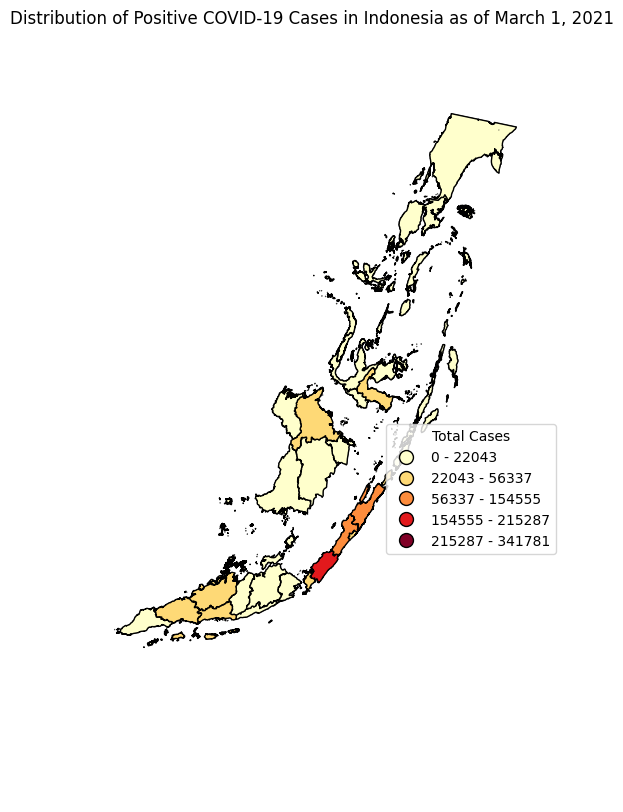

In [ ]:
merged_data = GeoDataFrame(merged_data)

fig, ax = plt.subplots(1, 1, figsize=(20, 10), subplot_kw=dict(projection=gcrs.AlbersEqualArea()))

gplt.polyplot(
    merged_data,
    ax=ax,
    facecolor="#f5f5f5",
    edgecolor="black",
    linewidth=0.5
)

gplt.choropleth(
    merged_data,
    ax=ax,
    hue="Total Cases",
    cmap="YlOrRd",
    legend=True,
    edgecolor="black",
    linewidth=1,
    scheme="FisherJenks"
)

ax.set_title(
    "Distribution of Positive COVID-19 Cases in Indonesia as of March 1, 2021",
    fontsize=12
)

ax.set_xlabel("Longitude", fontsize=16)
ax.set_ylabel("Latitude", fontsize=16)

legend = ax.get_legend()
legend.set_bbox_to_anchor((1, 0.5))
legend.set_title("Total Cases")

plt.show()

AttributeError: 'NoneType' object has no attribute 'set_bbox_to_anchor'

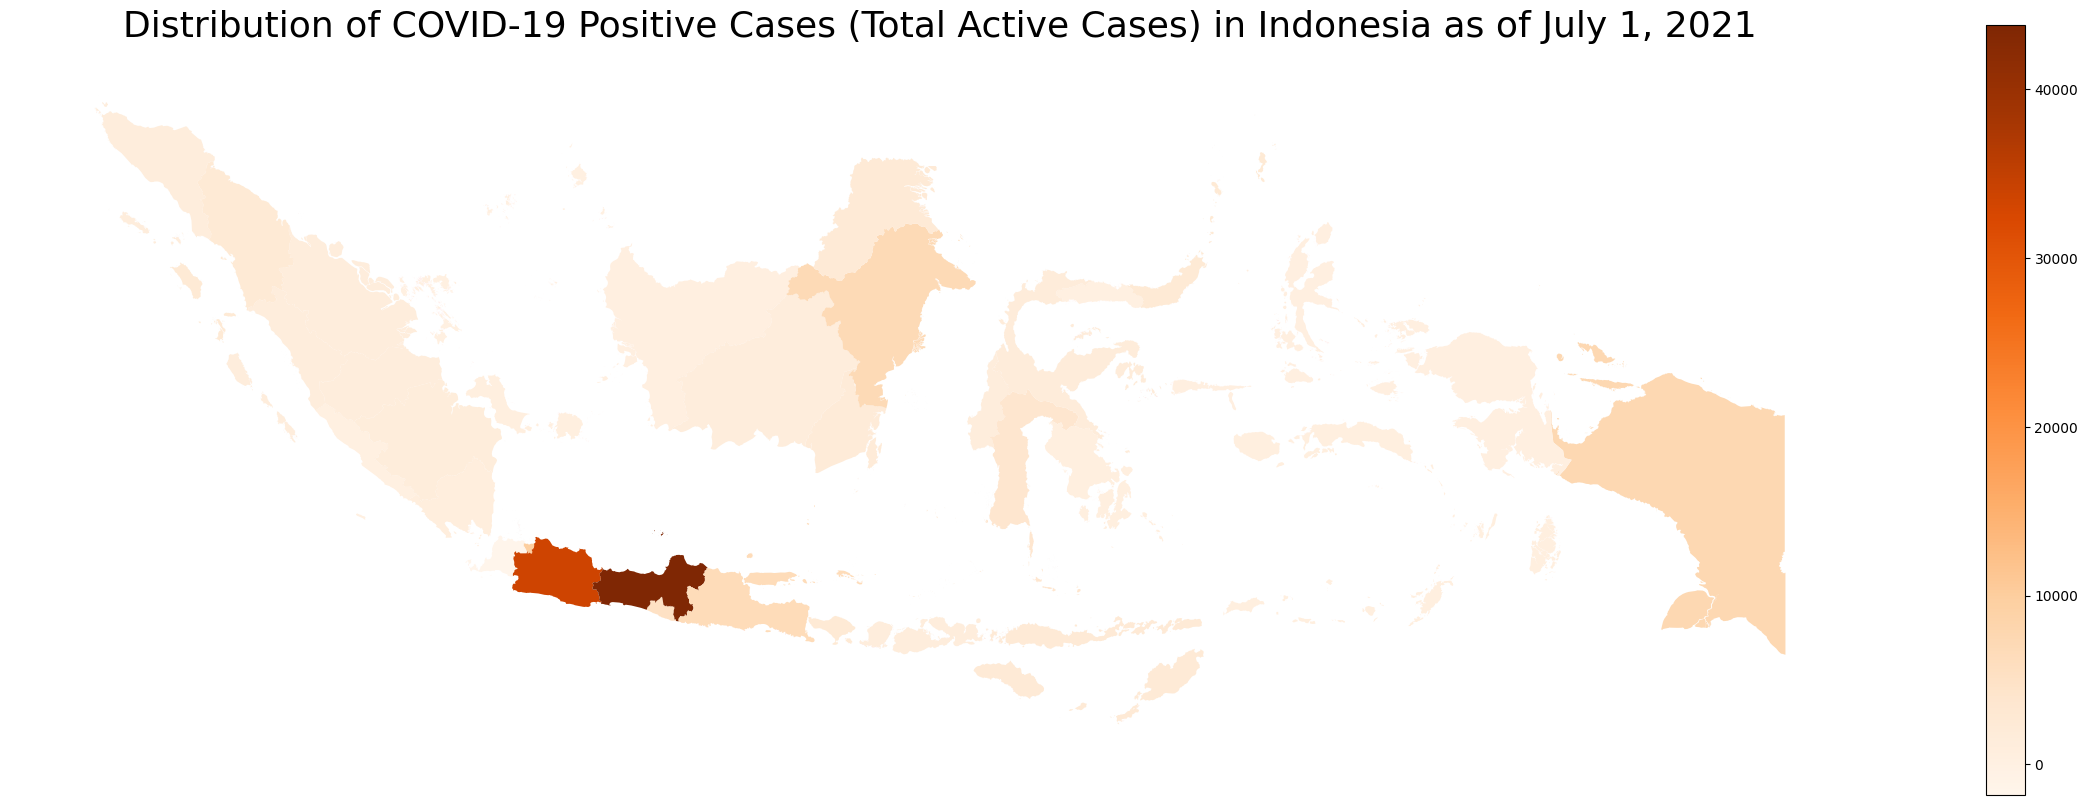

In [ ]:
merged_data.plot(
    column='Total Active Cases',
    cmap='Oranges',
    legend=True,
    figsize=(30, 10)
)

plt.axis('off')

plt.title(
    "Distribution of COVID-19 Positive Cases (Total Active Cases) in Indonesia as of July 1, 2021",
    fontsize=26,
    pad=20
)

fig = plt.gcf()
ax = fig.get_axes()[0]

legend = ax.get_legend()
legend.set_bbox_to_anchor((1.05, 0.5))
legend.set_title("Total Active Cases")

for text in legend.get_texts():
    text.set_fontsize(14)

plt.show()